# `mosiac` tutorial
__COSIM Seminar 05/07/20204__

*This notebook assumes you are a member of the `e3sm` unix group on `perlmutter`*. 
If that's not the case, please reachout and I help share the needed mesh files. 

In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean
import mosaic
import matplotlib.pyplot as plt
import xarray as xr

from pathlib import Path

In [2]:
# Start with defining filepaths and read in two examples datasets. 
e3sm_dir = Path("/global/cfs/cdirs/e3sm/inputdata/")

qu_mesh = "oQU240"
qu_file = "ocean.QU.240km.151209.nc"
qu_path = e3sm_dir / "ocn/mpas-o" / qu_mesh / qu_file

icos_mesh = "IcoswISC30E3r5"
icos_file = "mpaso.IcoswISC30E3r5.rstFromG-chrysalis.20231121.nc"    
icos_path = e3sm_dir / "ocn/mpas-o" / icos_mesh / icos_file

qu_ds = xr.open_dataset(qu_path).squeeze()
icos_ds = xr.open_dataset(icos_path).squeeze()
# restart files are missing this attribute. Will open PR in mosaic to fix this
icos_ds.attrs["is_periodic"] = "NO"

Define a `projection` for our figures and the `transform` of our dataset.

In [3]:
# define a map projection for our figure
projection = ccrs.Robinson(central_longitude=-50)
# define the transform that describes our dataset
transform = ccrs.Geodetic()
# transform = ccrs.PlateCarree() # also works

## `oQU240` Examples

In [4]:
# create a `Descriptor` object which takes the mesh information and creates 
# the polygon coordinate arrays needed for `matplotlib.collections.PolyCollection`.
qu_descriptor = mosaic.Descriptor(qu_ds, projection=projection, transform=transform)

CPU times: user 2.33 s, sys: 6.67 ms, total: 2.34 s
Wall time: 2.43 s


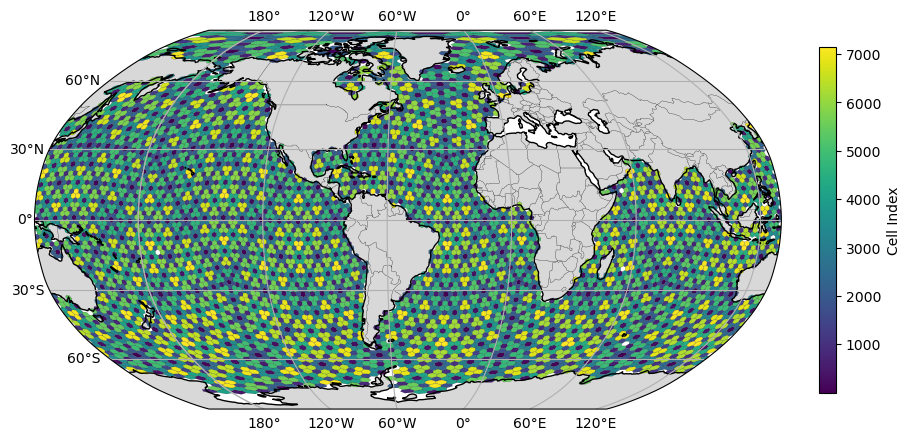

In [5]:
%%time 

# create the figure and a GeoAxis 
fig, ax = plt.subplots(figsize=(9, 7), constrained_layout=True,
                       subplot_kw=dict(projection=projection))

# using the `Descriptor` object we just created, make a pseudocolor plot of
# the "indexToCellID" variable, which is defined at cell centers.
collection = mosaic.polypcolor(ax, qu_descriptor, qu_ds.indexToCellID, antialiaseds=True, ec='k', lw=0.1)

ax.add_feature(cfeature.LAND, facecolor='gray', alpha=0.3)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, lw=0.2)


ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
fig.colorbar(collection, fraction=0.1, shrink=0.5, label="Cell Index");

CPU times: user 2.25 s, sys: 32.7 ms, total: 2.28 s
Wall time: 2.29 s


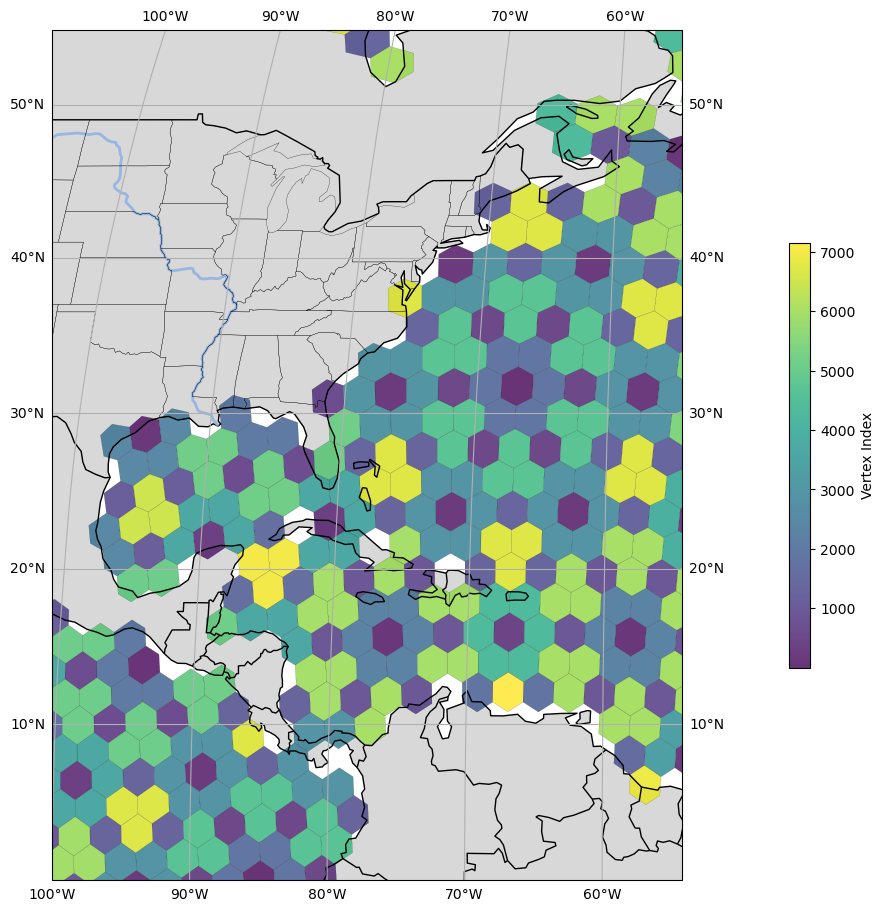

In [6]:
%%time 

# create the figure and a GeoAxis 
fig, ax = plt.subplots(figsize=(15, 9), constrained_layout=True,
                       subplot_kw=dict(projection=projection))

# using the *existing* `Descriptor` object we created created above, 
# we can plot varibales at all locations (i.e. cell, edge, and vertex values)
collection = mosaic.polypcolor(ax, qu_descriptor, qu_ds.indexToCellID,
                               antialiaseds=True, edgecolor='k', lw=0.1, alpha=0.8)


ax.add_feature(cfeature.LAND, facecolor='gray', alpha=0.3)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.RIVERS, lw=2)
ax.add_feature(cfeature.STATES, lw=0.2)

ax.set_extent([-100., -55., 0., 55.], ccrs.PlateCarree())
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
fig.colorbar(collection, fraction=0.1, shrink=0.5, label="Vertex Index");

CPU times: user 5.07 s, sys: 3.5 ms, total: 5.07 s
Wall time: 5.09 s


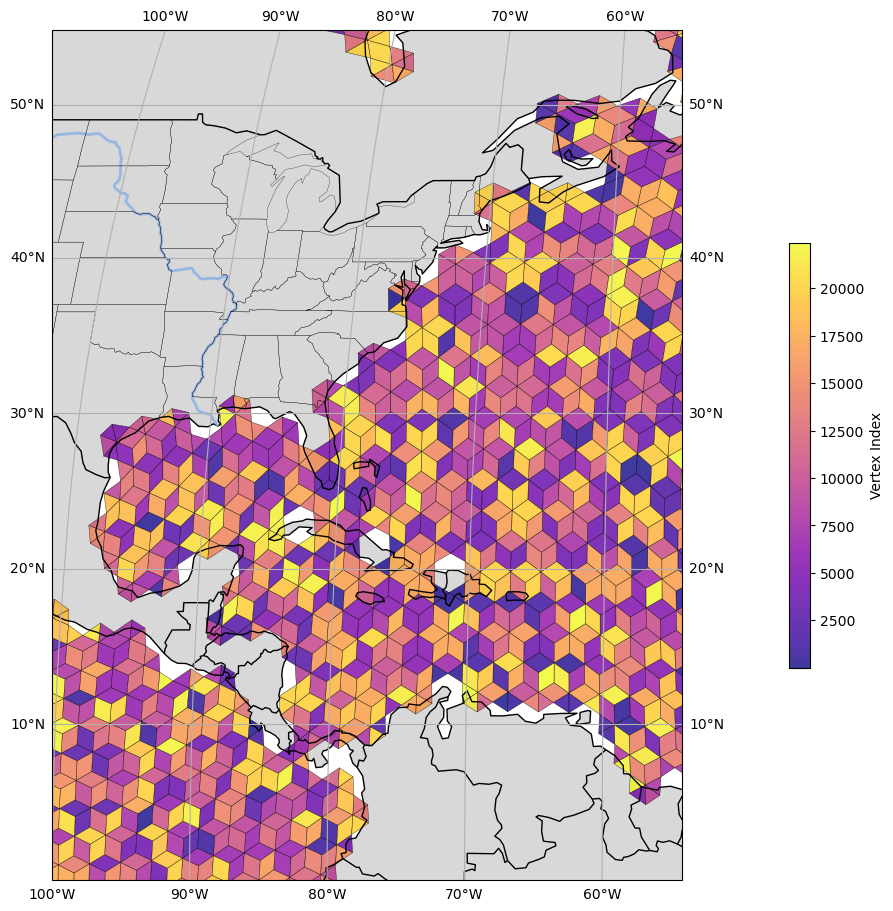

In [7]:
%%time 

# create the figure and a GeoAxis 
fig, ax = plt.subplots(figsize=(15, 9), constrained_layout=True,
                       subplot_kw=dict(projection=projection))

# using the *existing* `Descriptor` object we created created above, 
# we can plot varibales at all locations (i.e. cell, edge, and vertex values)
collection = mosaic.polypcolor(ax, qu_descriptor, qu_ds.indexToEdgeID,
                               cmap='plasma', antialiaseds=True,
                               edgecolor='k', lw=0.3, alpha=0.8)


ax.add_feature(cfeature.LAND, facecolor='gray', alpha=0.3)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.RIVERS, lw=2)
ax.add_feature(cfeature.STATES, lw=0.2)

ax.set_extent([-100., -55., 0., 55.], ccrs.PlateCarree())
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
fig.colorbar(collection, fraction=0.1, shrink=0.5, label="Vertex Index");

# `IcoswISC30E3r5` example

In [8]:
# create a `Descriptor` object which takes the mesh information and creates 
# the polygon coordinate arrays needed for `matplotlib.collections.PolyCollection`.
icos_descriptor = mosaic.Descriptor(icos_ds, projection=projection, transform=transform)

CPU times: user 28 s, sys: 530 ms, total: 28.5 s
Wall time: 28.6 s


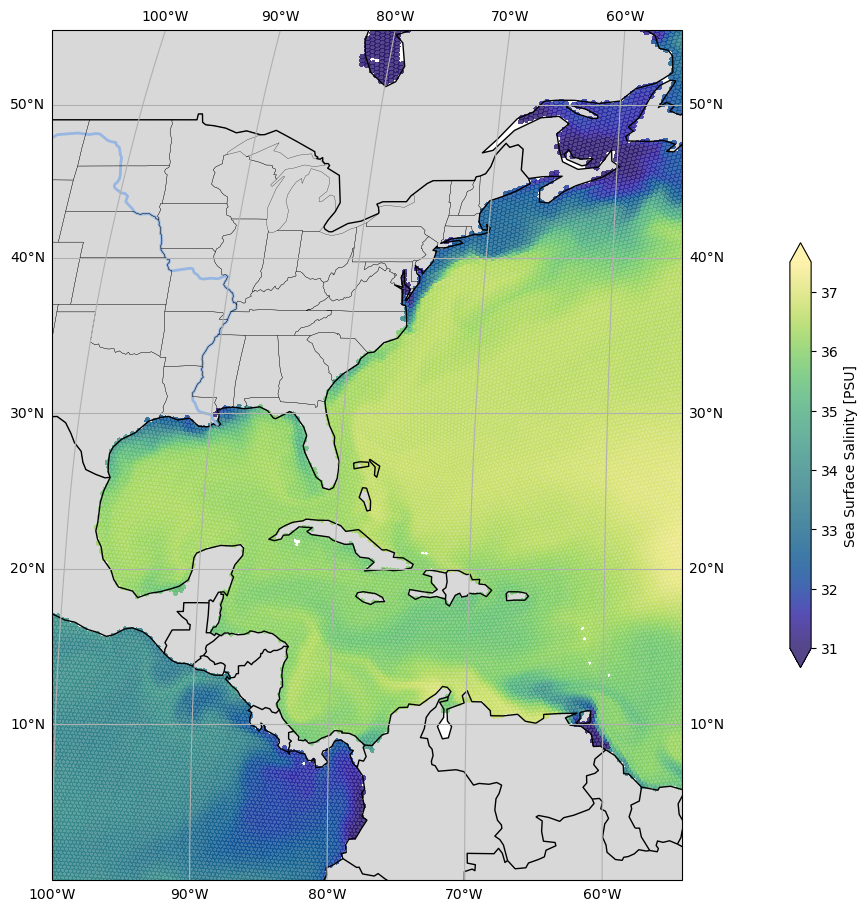

In [9]:
%%time 

# create the figure and a GeoAxis 
fig, ax = plt.subplots(figsize=(15, 9), constrained_layout=True,
                       subplot_kw=dict(projection=projection))

# using the *existing* `Descriptor` object we created created above, 
# we can plot varibales at all locations (i.e. cell, edge, and vertex values)
collection = mosaic.polypcolor(ax, icos_descriptor, icos_ds.salinitySurfaceValue,
                               antialiaseds=False, cmap="cmo.haline", alpha=0.8,
                               vmin=31, vmax=37.5)


ax.add_feature(cfeature.LAND, facecolor='gray', alpha=0.3)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.RIVERS, lw=2)
ax.add_feature(cfeature.STATES, lw=0.2)

ax.set_extent([-100., -55., 0., 55.], ccrs.PlateCarree())
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
fig.colorbar(collection, extend='both', shrink=0.5, label="Sea Surface Salinity [PSU]");

CPU times: user 28.4 s, sys: 447 ms, total: 28.9 s
Wall time: 28.9 s


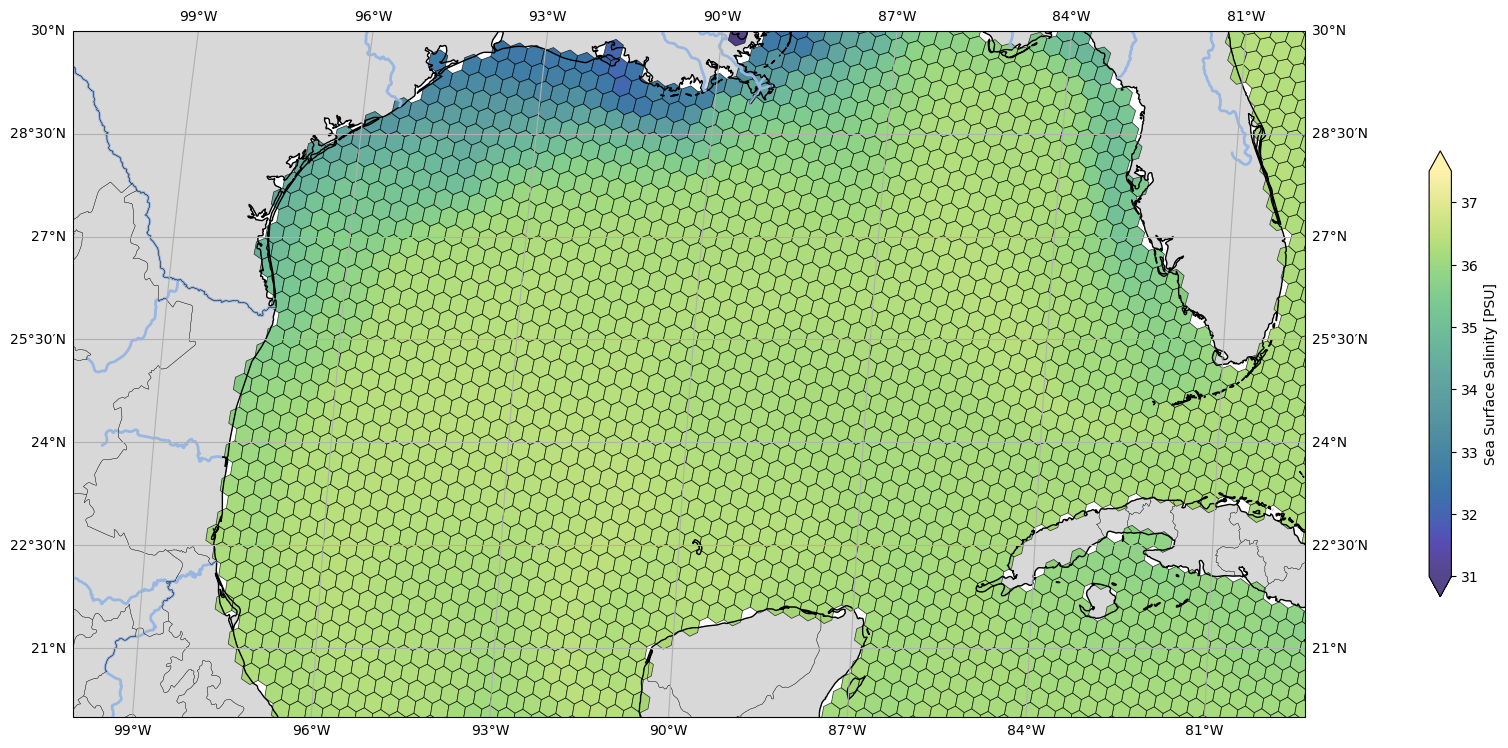

In [10]:
%%time 

# create the figure and a GeoAxis 
fig, ax = plt.subplots(figsize=(15, 9), constrained_layout=True,
                       subplot_kw=dict(projection=projection))

# using the *existing* `Descriptor` object we created created above, 
# we can plot varibales at all locations (i.e. cell, edge, and vertex values)
collection = mosaic.polypcolor(ax, icos_descriptor, icos_ds.salinitySurfaceValue,
                               antialiaseds=True, cmap="cmo.haline", alpha=0.8,
                               vmin=31, vmax=37.5, ec='k', lw=0.5)


ax.add_feature(cfeature.LAND, facecolor='gray', alpha=0.3)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.RIVERS, lw=2)
ax.add_feature(cfeature.STATES, lw=0.2)

#GoM Extent 
ax.set_extent([-100., -80., 20, 30.], ccrs.PlateCarree())
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
fig.colorbar(collection, extend='both', shrink=0.5, label="Sea Surface Salinity [PSU]");

Try plotting `indexToVertexID` for the `IcoswISC30E3r5`!